In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#load layout 
##Note: must contain wells ids as 'Well_ID', A01 - end of series; well contents as 'contents' or 'BLANK' if blank. NO SPACES IN NAMES!
Layout = pd.read_csv(r"PATH")
contents = Layout['contents']


NameError: name 'pd' is not defined

In [251]:
#input conversion factor if using different plate readers, else use 1
conv_factor = 1.3

In [252]:
#load data - must be in style of Biotek plate reader; 1st column named 'Wells' with Well_IDs same as Layout; time in 1st row across the top, ODs inbetween
df = pd.read_csv(r"PATH")
num = df._get_numeric_data()
num[num < 0] = 0
# extract timecourse and convert to floating point number
time = list(df.columns.values)
time = time[1:]
time = [float(i) for i in time]

time_inc = 1/60 #the time increment you want to convert  
time = [(i*time_inc) for i in time] #e.g., if your data is stored as seconds but you want minute

time = [round(i,0) for i in time] #use this if you want to round your times to a decimal point
# #replace rows with header Wells with contents from Layout file - maintains header Wells 
df1 = df.assign(Wells = contents)


In [2]:

#slice desired wells by Layout - this creates individual dataframes for each group of wells you want. You can do these by content, or play around with Boolean to group wells
contents1 = df1.loc[(df1["Wells"] == "contents1")]## you will need a line of this code for every group you want to plot with the contetns of the cells you want to plot replacing contertnts1


print(contents1)

NameError: name 'df1' is not defined

In [ ]:
#calculate max slope - if time vs OD, this is grwoth rate.

condition1_avlist = condition1.mean(axis=0,)
condition1_avmax = (max([x - z for x, z in zip(condition1_avlist[:-1], condition1_avlist[1:])]))*conv_factor
condition1_errlist = condition1.std(axis=0,)
index = condition1_avlist.index(condition1_avmax)
condition1_errmax = condition1_errlist.index(index)


In [261]:
#blank correction - takes single average of all blank wells

blank_av = df1.loc[(df1["Wells"] == "BLANK")]
blank_av = blank_av.mean(axis=0)


0            -0.110468
2699.997     -0.110376
5399.983     -0.081236
8099.972     -0.085649
10799.973    -0.061289
13499.913    -0.067907
16199.845    -0.083902
18899.804    -0.094381
21599.789    -0.094197
24299.762    -0.095484
26999.736    -0.102103
29699.736    -0.096312
32399.729    -0.100724
35099.724    -0.090337
37799.71     -0.087487
40499.705    -0.084454
43199.703    -0.082707
45899.633    -0.081604
48599.571    -0.081052
51299.525    -0.085832
53999.493    -0.084729
56699.477    -0.084086
59399.449    -0.083994
62099.428    -0.084270
64799.411    -0.082155
67499.402    -0.079582
70199.387    -0.078295
72899.384    -0.072779
75599.382    -0.066069
78299.339    -0.060278
80999.279    -0.054762
83699.236    -0.058807
86399.1845   -0.052740
89099.1347   -0.055589
91799.0849   -0.055589
94499.0351   -0.055681
dtype: float64


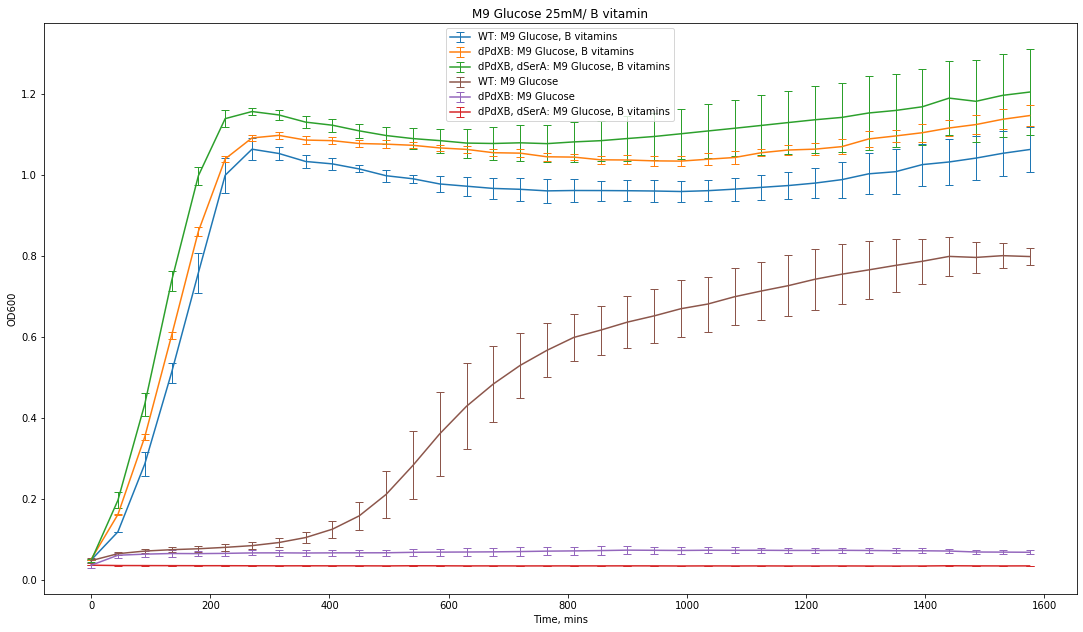

In [265]:
#plot mean
## REMOVE - blank_av IF YOU DO NOT HAVE BLANK WELLS 

line1 = plt.errorbar(time, contents1.mean(axis=0,)*conv_factor - blank_av.mean(axis=0) , yerr= contents1.std(axis=0)*conv_factor, elinewidth=1,
              capsize=4, capthick=1, linewidth=3)

plt.title("TITLE")
plt.legend([line1],
           [ 'Series 1: Media or Strain', ], loc = 'best')


plt.xlabel('Time, mins')
plt.ylabel('OD600')
fig.legend
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
# fig.savefig('test2png.png', dpi=100)